## Metode Trapesium

Definisi sebuah integral dari suatu fungsi adalah luasan yang terdapat dibawah fungsi dalam batas tertentu.
Sehingga untuk menghitung luasan tersebut dapat didekati dengan menggunakan luasan trapesium

Sebagai contoh:
Hitunglah

\begin{equation}
\int_{0}^{1} e^{-x^2} dx
\end{equation}

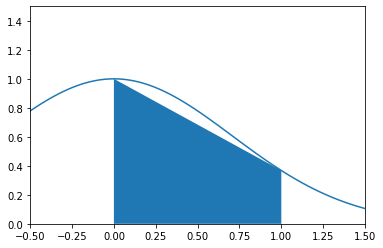

In [8]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(-x**2)
x = np.linspace(-0.5,1.5,100)
y = f(x)
plt.plot(x,y)

x0 = 0
x1 = 1
y0 = f(x0); y1 = f(x1);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

In [7]:
A = 0.5*(x1 - x0)*(y1 + y0)
print("Trapezoid area:",A)

Trapezoid area: 0.6839397205857212


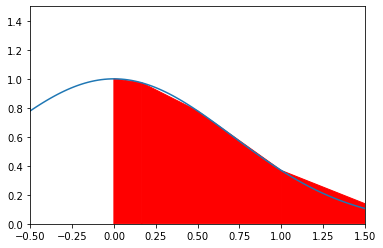

In [36]:
f = lambda x: np.exp(-x**2)
x = np.linspace(-0.5,1.5,100)
y = f(x)
plt.plot(x,y)

x0 = 0
x1 = 1
N = 6
h = (x1 - x0)/N

for i in range(N):
    x_next = x0 + i*h
    xs = [x0,x0,x_next,x_next]
    ys = [0,f(x0),f(x_next),0]
    plt.fill(xs,ys,'r',edgecolor='r')
    x0 = x_next
 

plt.xlim([-0.5,1.5])
plt.ylim([0,1.5]);
plt.show()

### Hitunglah integral dari fungsi berikut

\begin{equation}
\int_{0}^{5}\frac{1}{1 + x^2} dx
\end{equation}

Secara analitik persamaan ini akan menghasilkan 
\begin{equation}
\arctan{x}
\end{equation}

In [21]:
import numpy as np

f = lambda x : 1/(1+x**2)
a = 0
b = 5
N = 200
h = (b-a)/N

x0 = a
sum = 0
for i in range(1, N):
    x_next = a + i*h
    sum += (f(x0) + f(x_next))*h/2
    x0 = x_next
    
print(sum)
print(np.arctan(5))

1.3724338021431133
1.373400766945016


In [31]:
a = 0
b = 5
N = 150
x = np.linspace(a,b,N+1)
y = f(x)
y_left = y[1:]
y_right = y[:-1]

dx = x[1]-x[0]
Area = dx/2 * np.sum(y_left + y_right)
Area

1.373399397242914

#### Pertanyaan:
#### Buktikan integral dari
\begin{equation}
\int_{1}^{2} \frac{1}{x} dx = ln(2)
\end{equation}


## Metode Monte Carlo

Hitunglah

\begin{equation}
\int_{0}^{1} x^2 dx
\end{equation}

In [51]:
n = 100000
s0 = 0
ds = 0
for i in range(n):
    x = np.random.rand()
    f = x*x
    s0 += f
    ds += f*f

s0 /= n
ds /= n
print(s0)
print(np.sqrt(abs(ds - s0**2)/n))

0.33372206669991145
0.0009451253277675899


In [85]:
n = 1000000
s0 = 0
ds = 0
for i in range(n):
    x = np.random.uniform()*2
    f = x*x
    s0 += f
    ds += f*f

s0 /= n
ds /= n
print(s0*2)
print(np.sqrt(abs(ds - s0**2)/n))

2.667819616882819
0.0011928890442911605


### Hitunglah nilai integral dari

\begin{equation}
\int_{0}^{5} \frac{e^{-x}}{1+(x - 1)^2} dx
\end{equation}

In [79]:
def get_rand_number(min_value, max_value):
    range = max_value - min_value
    choice = np.random.uniform(0,1)
    return min_value + range*choice

In [83]:
def f_of_x(x):
    return (np.exp(-1*x))/(1+(x-1)**2)

In [84]:
def crude_monte_carlo(num_samples=5000):
    lower_bound = 0
    upper_bound = 5
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

0.6975071359611145

In [86]:
def get_crude_MC_variance(num_samples):
    # get the average of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)**2
    sum_of_sqs = running_total*int_max / num_samples
    
    # get square of average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total = f_of_x(x)
    sq_ave = (int_max*running_total/num_samples)**2
    
    return sum_of_sqs - sq_ave

In [93]:
int_max = 5
hasil = crude_monte_carlo(num_samples=8000)
variance = get_crude_MC_variance(num_samples = 8000)

print(hasil, variance)

0.7093006602175246 0.2679670124523033
